In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from sklearn import model_selection
from sklearn import datasets
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [4]:
Xdf=pd.read_csv('hw2_problem_4_X.csv')
ydf=pd.read_csv('hw2_problem_4_y.csv')
Xdf_blind=pd.read_csv('hw2_problem_4_X_blind.csv')
X=np.array(Xdf.values[:,1:],dtype=np.float64)
y=np.array(ydf.values[:,1],dtype=np.float64)
X_blind=np.array(Xdf_blind.values[:,1:],dtype=np.float64)
# split data into training and validation dataset
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, random_state=42)

In [10]:
std_scaler = preprocessing.StandardScaler()
minmax_scaler = preprocessing.MinMaxScaler()
maxabs_scaler = preprocessing.MaxAbsScaler()

In [15]:
alpha = np.logspace(-4, 4, 200)
best_alpha = 0
model_names=['std-rdg','std-lss','minmax-rdg','minmax-lss','maxabs-rdg','maxabs-lss']
mse_list = [[],[],[],[],[],[]]

for a in alphas:
    ridge = linear_model.Ridge(alpha = a)
    lasso = linear_model.Lasso(alpha = a)
    models_to_compare=[pipeline.Pipeline([('scaler',std_scaler), ('regressor',ridge)]),\
                            pipeline.Pipeline([('scaler',std_scaler), ('regressor',lasso)]),\
                            pipeline.Pipeline([('scaler',minmax_scaler), ('regressor',ridge)]),\
                            pipeline.Pipeline([('scaler',minmax_scaler), ('regressor',lasso)]),\
                            pipeline.Pipeline([('scaler',maxabs_scaler), ('regressor',ridge)]),\
                            pipeline.Pipeline([('scaler',maxabs_scaler), ('regressor',lasso)])]
    for model, name in zip(models_to_compare, model_names):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        cur_mse = mean_squared_error(y_valid, y_pred)
        if name=='std-rdg':
            mse_list[0].append(cur_mse)
        elif name=='std-lss':
            mse_list[1].append(cur_mse)
        elif name=='minmax-rdg':
            mse_list[2].append(cur_mse)
        elif name=='minmax-lss':
            mse_list[3].append(cur_mse)
        elif name=='maxabs-rdg':
            mse_list[4].append(cur_mse)
        else:
            mse_list[5].append(cur_mse)

best_model = []
best_alpha = 0
min_mse = 0            
for i in range(0,6):
    for cur_mse in mse_list[i]:
        if min_mse==0 or min_mse>cur_mse:
            min_mse = cur_mse
            best_model = model_names[i]
            best_mse_index = mse_list[i].index(cur_mse)
            best_alpha = alpha[best_mse_index]

print("best model is "+best_model)
print("min mse is "+str(min_mse))
print("best alpha is "+str(best_alpha))

best model is minmax-lss
min mse is 1.5676015914936972
best alpha is 0.02354286414322418


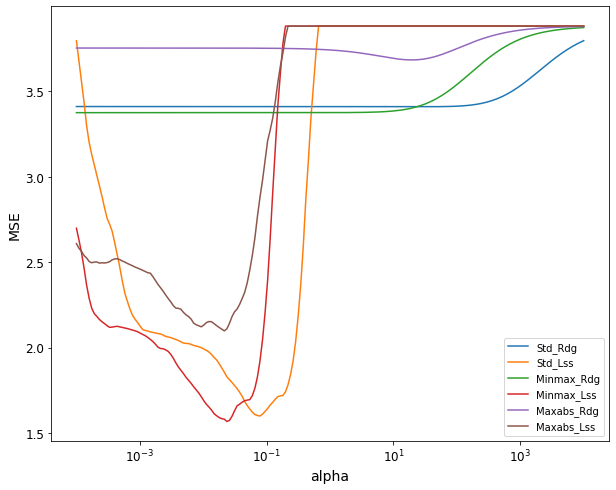

In [17]:
fig=plt.figure(figsize=[10,8])
ax = plt.gca()
ax.set_xscale('log')
plt.plot(alpha,mse_list[0],label='Std_Rdg')
plt.plot(alpha,mse_list[1],label='Std_Lss')
plt.plot(alpha,mse_list[2],label='Minmax_Rdg')
plt.plot(alpha,mse_list[3],label='Minmax_Lss')
plt.plot(alpha,mse_list[4],label='Maxabs_Rdg')
plt.plot(alpha,mse_list[5],label='Maxabs_Lss')
plt.xlabel("alpha")
plt.ylabel('MSE')
plt.legend()
plt.show()

In [18]:
lasso = linear_model.Lasso(alpha = best_alpha)
model = pipeline.Pipeline([('scaler',minmax_scaler), ('regressor',lasso)])
model.fit(X_train, y_train)
y_blind_pred = model.predict(X_blind)
Xdf=pd.DataFrame(y_blind_pred)
Xdf.to_csv('./hw2_problem_4_y_blind_predicted.csv')